## Data Exploration questions:
* What are the least desirable attributes in a male partner? Does this differ for female partners?
* How important do people think attractiveness is in potential mate selection vs. its real impact?
* Are shared interests more important than a shared racial background?
* Can people accurately predict their own perceived value in the dating market?
* In terms of getting a second date, is it better to be someone's first speed date of the night or their last?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu, shapiro
tinder = pd.read_csv('Speed_Dating_Data.csv', encoding='ISO-8859-1')

# Presentation of the data

Mean age female: 26.105850934692885
Mean age males: 26.609269932756966


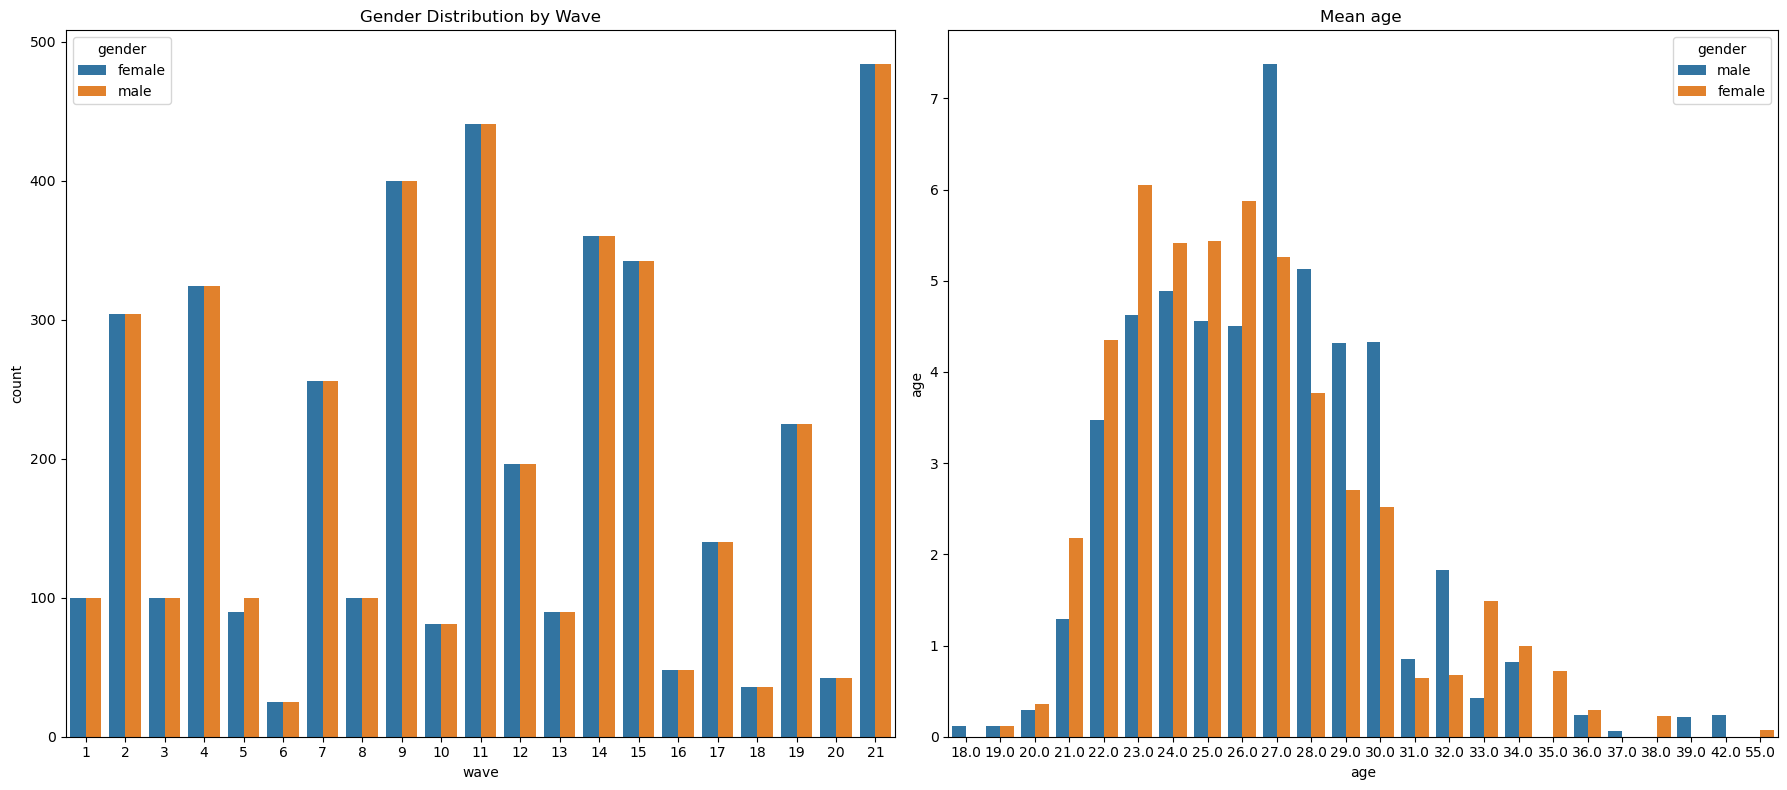

In [4]:
# Replace gender values 0 and 1 with 'female' and 'male'
tinder['gender'] = tinder['gender'].replace({0: 'female', 1: 'male'})

# Group by 'wave' and 'gender' to count occurrences
grouped = tinder.groupby("wave")["gender"].value_counts().reset_index(name="count")

fig, axes = plt.subplots(1, 2, figsize=(18, 8))
# Plotting gender distribution by wave
sns.countplot(data=tinder, x='wave', hue='gender', ax=axes[0])
axes[0].set_title("Gender Distribution by Wave")

# Plotting mean age according to age
sns.barplot(data=tinder, x="age", y="age", hue='gender', estimator=lambda x: len(x) / len(tinder) * 100, ax=axes[1])
axes[1].set_title("Mean age ")
print("Mean age female:", tinder[tinder['gender']=='female']["age"].mean())
print("Mean age males:", tinder[tinder['gender']=='male']["age"].mean())

# Adjust layout
plt.tight_layout()
plt.savefig("gender and age distribution.png", dpi=300)
plt.show()

- There'is a total of 21 waves where people met between them
- The mean age of the participants is 27 for male and 26 for women

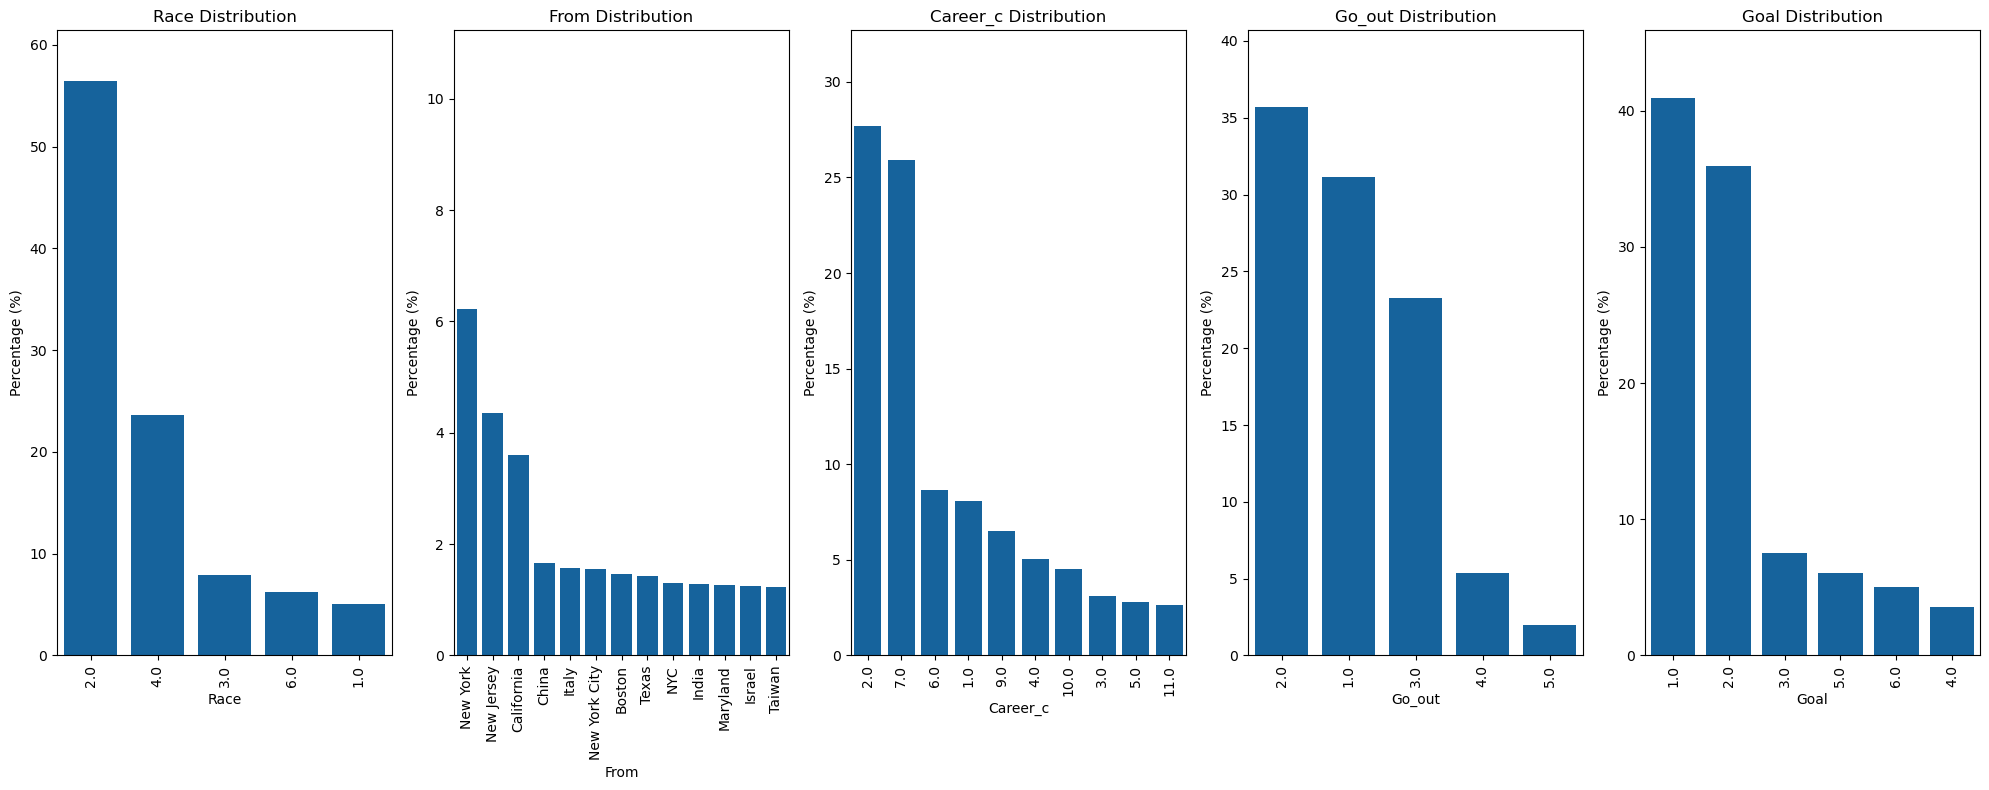

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

properties = ['race','from', 'career_c', 'go_out', 'goal']

# Calculate total number of rows for the subplot
total = tinder.shape[0]

# Create a figure and axes for subplots
fig, axes = plt.subplots(1, len(properties), figsize=(20, 8))

# Loop through each property to plot in a subplot
for i, prop in enumerate(properties):
    # Calculate counts and filtered values for the current property
    counts = tinder[prop].value_counts().sort_values(ascending=False)
    filtered_values = counts[counts > 100] / total * 100
    filtered_df = pd.DataFrame({'value_counts': filtered_values})

    # Create a barplot for the current property in the respective subplot
    sns.barplot(data=filtered_df, x=filtered_df.index, y='value_counts', order=filtered_df.index, color="#0066b2", ax=axes[i])
    axes[i].set_title(f"{prop.capitalize()} Distribution")
    axes[i].set_xlabel(prop.capitalize())
    axes[i].set_ylabel("Percentage (%)")
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].set_ylim(0, filtered_df['value_counts'].max() + 5)  # Adjust y-axis limit for better visualization

# Adjust layout and display the plot
plt.tight_layout()
plt.savefig("other properties distribution.png", dpi=300)
plt.show()


- More of 50% of the participants are Caucasian American, coming from New York, New Jersey and California
- 27% of the participants careers are mainly Academic/Research, 25% are involved in Finances/Business and 9% in Creative arts.
- 35% participants say to go on dates twice a week, 30% several times a week and 24% once a week.
- The main goals of the participants taking part of this"experiment" are 40% have a fun night out, 35% answered to meet new people while less than 10% are looking for a serious relationship.

C:\Users\CGC\AppData\Local\Temp\ipykernel_1644\3539336687.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=14, rotation=90)
C:\Users\CGC\AppData\Local\Temp\ipykernel_1644\3539336687.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_yticklabels(axes[0].get_yticklabels(), fontsize=14)
C:\Users\CGC\AppData\Local\Temp\ipykernel_1644\3539336687.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=14, rotation=90)
C:\Users\CGC\AppData\Local\Temp\ipykernel_1644\3539336687.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes

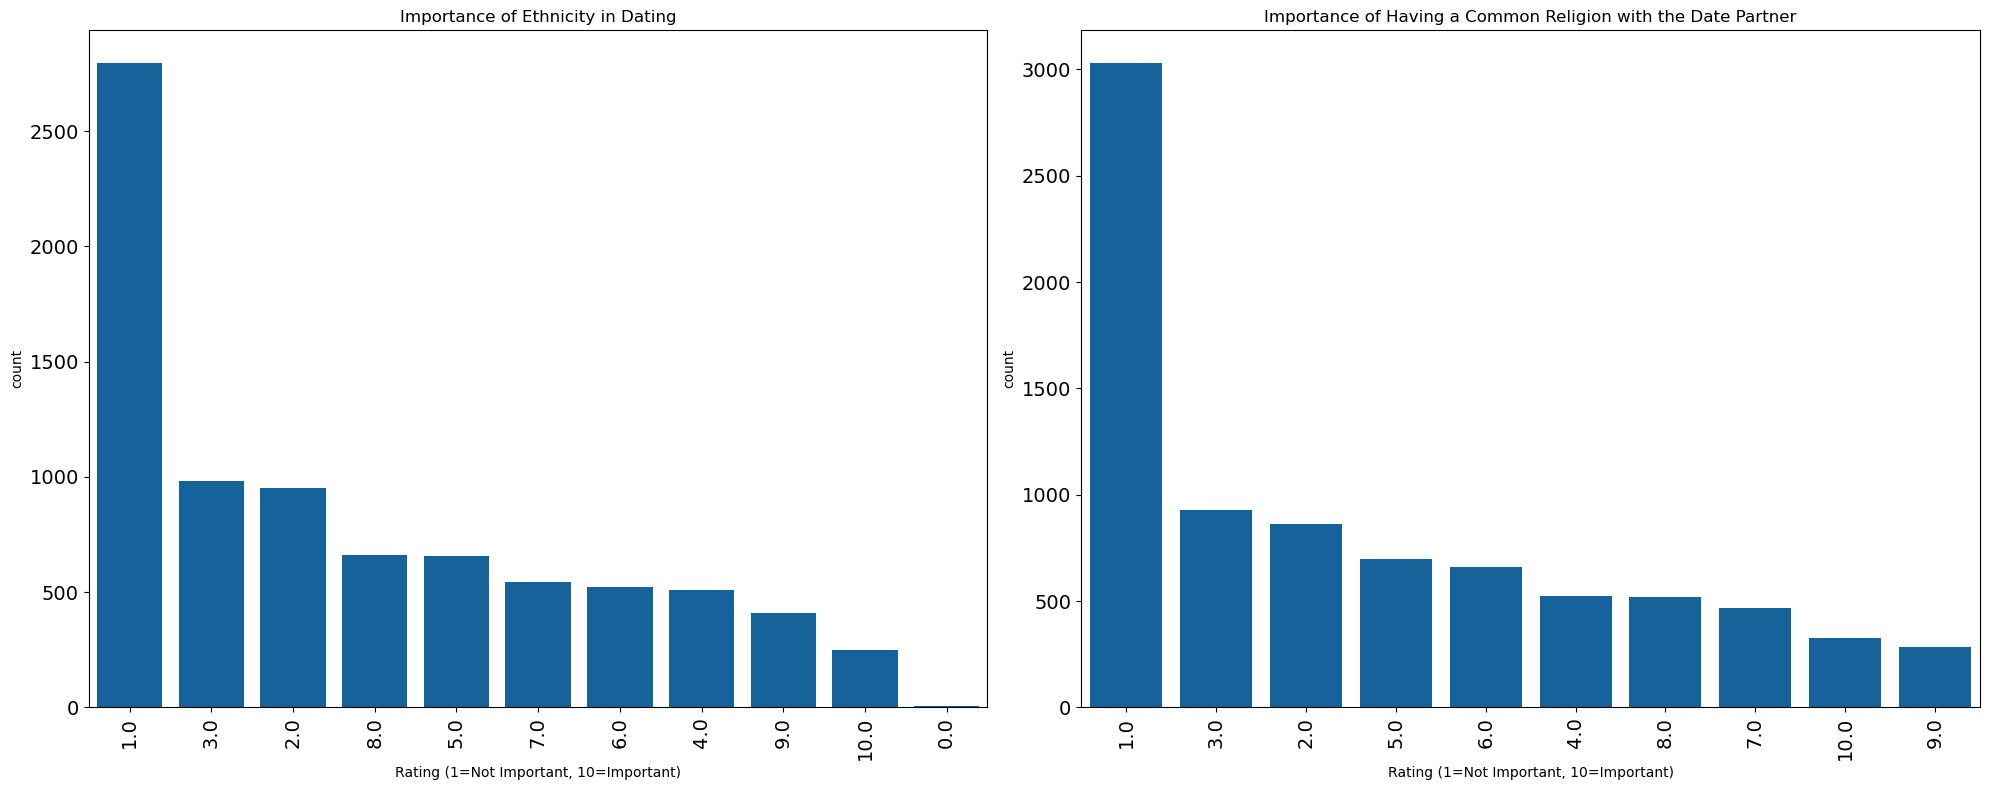

In [6]:
sorted_values_imprace = tinder['imprace'].value_counts().sort_values(ascending=False)
sorted_values_imprelig = tinder['imprelig'].value_counts().sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(20, 8))
# Plot for importance of ethnicity
sns.countplot(data=tinder, x="imprace", order=sorted_values_imprace.index, color="#0066b2", ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=14, rotation=90)
axes[0].set_yticklabels(axes[0].get_yticklabels(), fontsize=14)
axes[0].set_title("Importance of Ethnicity in Dating")
axes[0].set_xlabel('Rating (1=Not Important, 10=Important)')

# Plot for importance of religion
sns.countplot(data=tinder, x="imprelig", order=sorted_values_imprelig.index, color="#0066b2", ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=14, rotation=90)
axes[1].set_yticklabels(axes[1].get_yticklabels(), fontsize=14)
axes[1].set_title("Importance of Having a Common Religion with the Date Partner")
axes[1].set_xlabel('Rating (1=Not Important, 10=Important)')
plt.tight_layout()
plt.savefig("etchnicity and religion.png", dpi=300)
plt.show()

- According to the participants opinion it is important to belong to the same ethnicity group and religion.

# What are the participants interests?

Highest count for tvsports: 1522 with item 1.0
Highest count for exercise: 1358 with item 8.0
Highest count for dining: 1924 with item 8.0
Highest count for museums: 1801 with item 7.0
Highest count for art: 1750 with item 8.0
Highest count for hiking: 1212 with item 8.0
Highest count for gaming: 1983 with item 1.0
Highest count for clubbing: 1402 with item 8.0
Highest count for reading: 2000 with item 9.0
Highest count for tv: 1381 with item 6.0
Highest count for theater: 1618 with item 7.0
Highest count for movies: 2021 with item 8.0
Highest count for concerts: 1531 with item 7.0
Highest count for music: 1789 with item 10.0
Highest count for shopping: 1198 with item 7.0
Highest count for yoga: 1549 with item 1.0


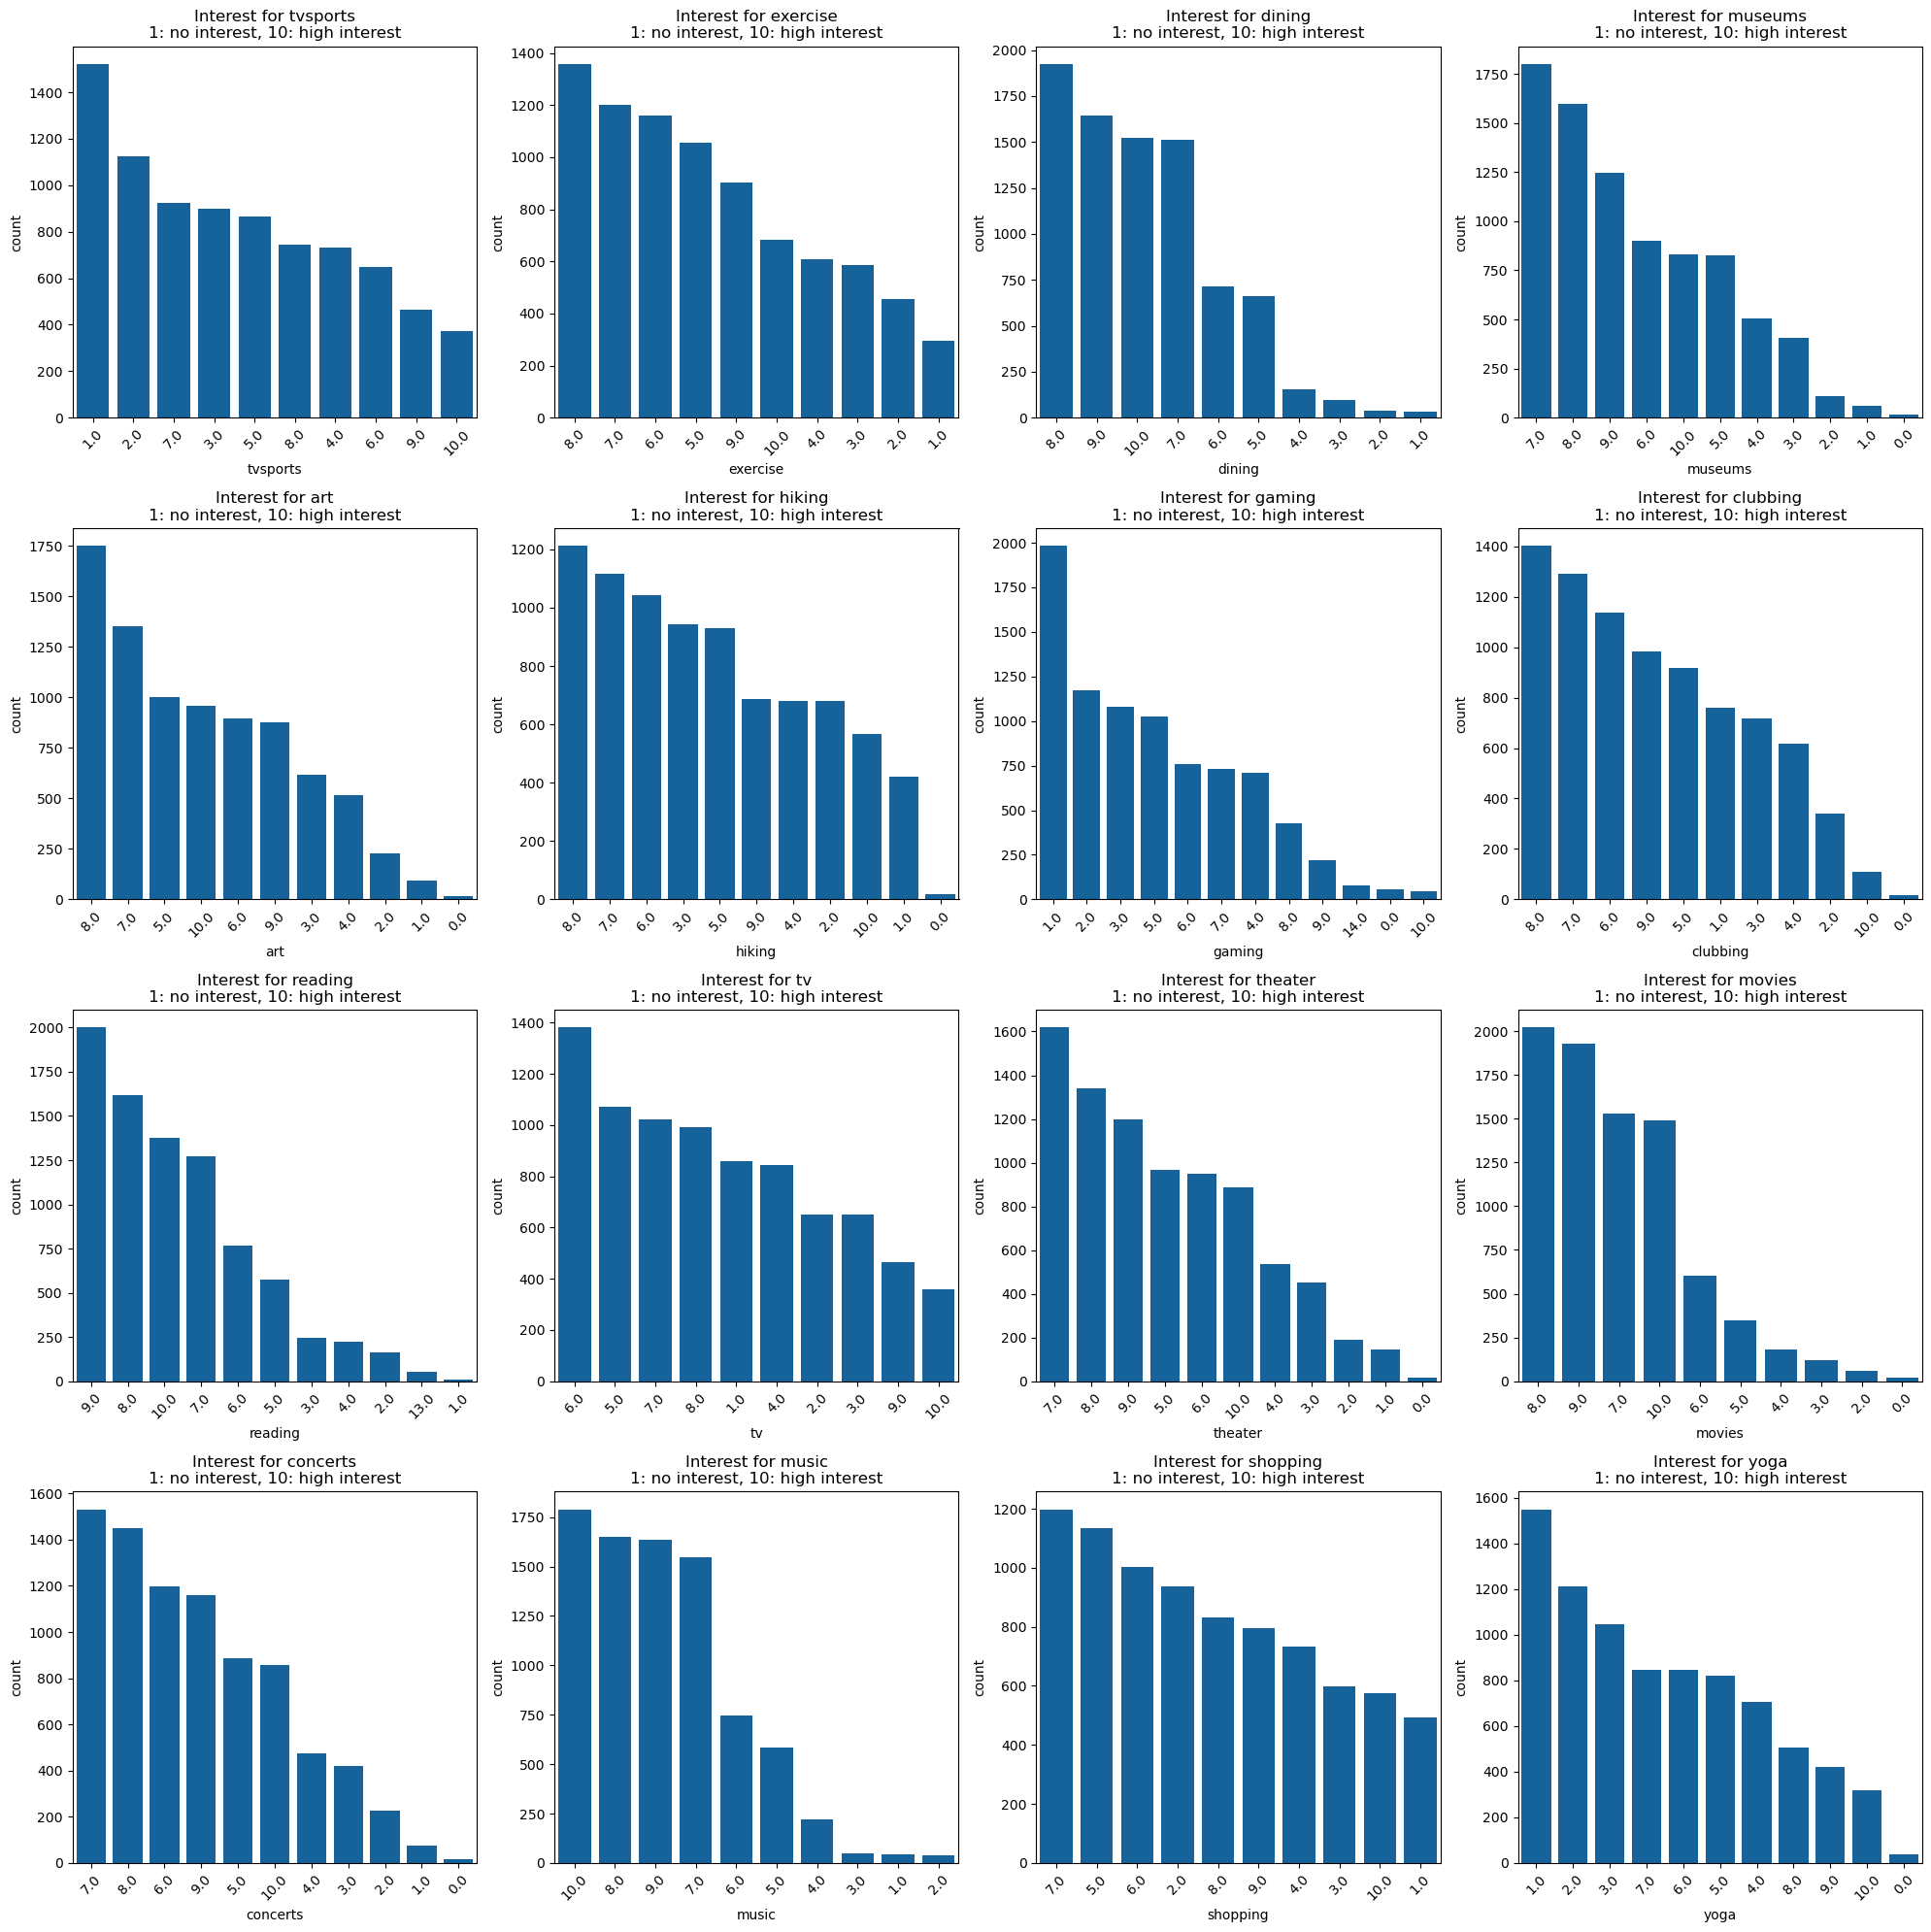

In [7]:
# Initialize the highest_counts dictionary
highest_counts = {}

activities = ["tvsports", "exercise", "dining", "museums", "art", "hiking", "gaming", 
              "clubbing", "reading", "tv", "theater", "movies", "concerts", "music", 
              "shopping", "yoga"]

# Set the figure size outside the loop to create a single figure
plt.figure(figsize=(20, 20))

for index, activity in enumerate(activities, start=1):
    plt.subplot(4, 4, index)
    sorted_values2 = tinder[activity].value_counts().sort_values(ascending=False)
    highest_counts[activity] = {'value': sorted_values2.iloc[0], 'item': sorted_values2.index[0]}
    plt.title(f"Interest for {activity}\n1: no interest, 10: high interest")
    sns.countplot(data=tinder, x=activity, order=sorted_values2.index, color="#0066b2")
    plt.xticks(fontsize=10, rotation=45)
    plt.yticks(fontsize=10)
    plt.tight_layout()

# Print highest counts for each activity
for activity, data in highest_counts.items():
    print(f"Highest count for {activity}: {data['value']} with item {data['item']}")

plt.savefig("rank of the activities interesets.png", dpi=300)
plt.show()

C:\Users\CGC\AppData\Local\Temp\ipykernel_1644\1322484956.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='activity', y='highest_item', order=df['activity'], palette='viridis')


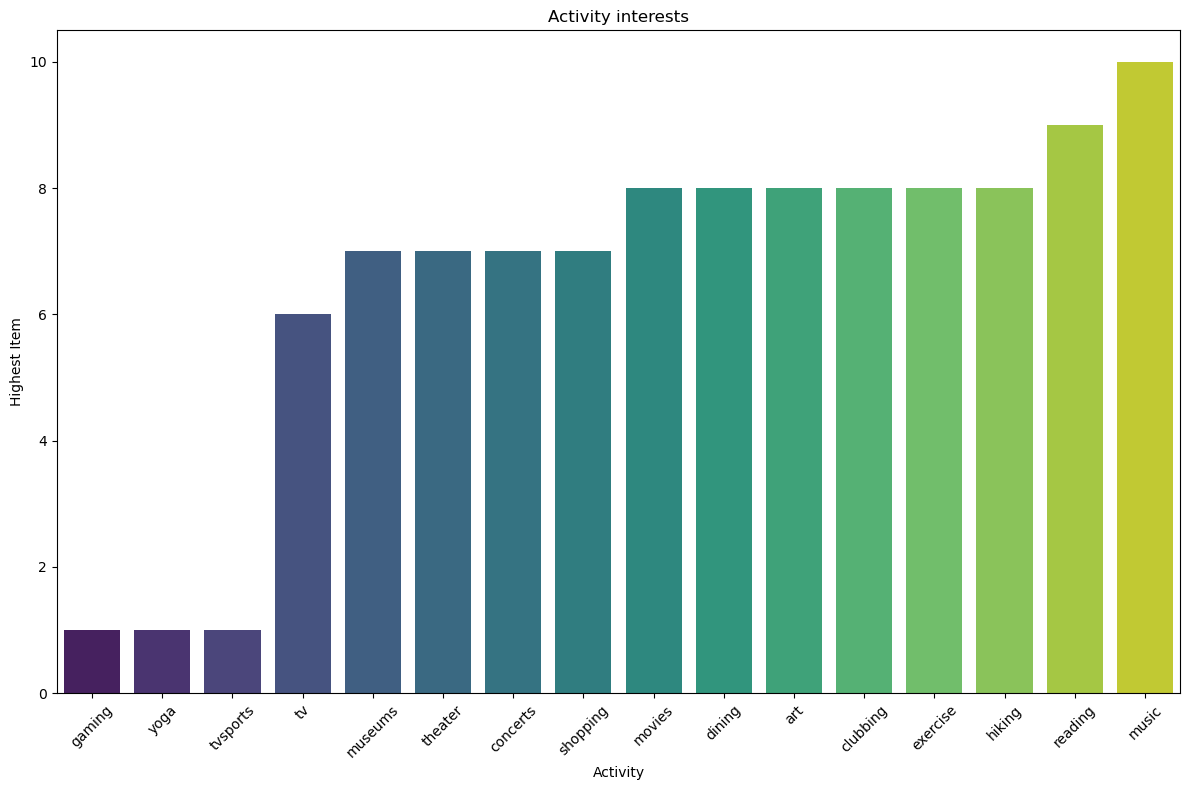

In [8]:
data = {
    'activity': ['movies', 'reading', 'gaming', 'dining', 'museums', 'music', 'art', 'theater', 'yoga', 'concerts', 'tvsports', 'clubbing', 'tv', 'exercise', 'hiking', 'shopping'],
    'count': [2021.0, 2000.0, 1983.0, 1924.0, 1801.0, 1789.0, 1750.0, 1618.0, 1549.0, 1531.0, 1522.0, 1402.0, 1381.0, 1358.0, 1212.0, 1198.0],
    'highest_item': [8.0, 9.0, 1.0, 8.0, 7.0, 10.0, 8.0, 7.0, 1.0, 7.0, 1.0, 8.0, 6.0, 8.0, 8.0, 7.0]}

df = pd.DataFrame(data)
df = df.sort_values(by='highest_item', ascending=True)

# Create a barplot
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='activity', y='highest_item', order=df['activity'], palette='viridis')
plt.title('Activity interests')
plt.xlabel('Activity')
plt.ylabel('Highest Item')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Activity interests.png", dpi=300)
plt.show()

- Music and reading are the most important activities participants followed by hiking, exercise, clubbing, art, dinning and movies.  
- Gaming,yoga and tv are the least interesting for the participants.

# QUESTIONS answered:
- Is there any sex difference in the perception of the attributes?
- How important do people think attractiveness is in potential mate selection vs. its real impact? 
- Are shared interests more important than a shared racial background? 
- Can people accurately predict their own perceived value in the dating market? 

# How important do people think attractiveness is in potential mate selection vs. its real impact?

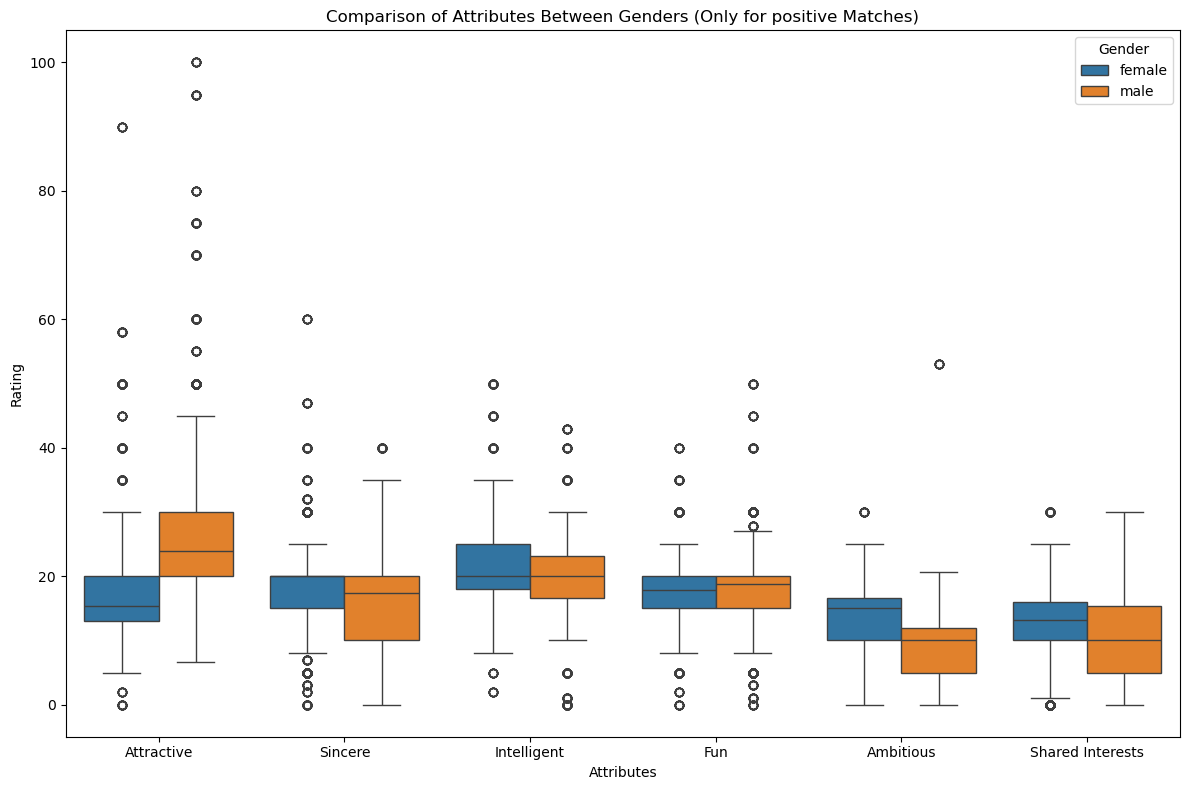

In [24]:
# Plot comparing male and female attributes when a match occurred
plt.figure(figsize=(12, 8))
sns.boxplot(data= tinder_melted , x="variable", y="value", hue="gender")
plt.title("Comparison of Attributes Between Genders (Only for positive Matches)")
plt.xlabel("Attributes")
plt.ylabel("Rating")
plt.legend(title='Gender', loc='upper right')

# Save and show the plot
plt.tight_layout()
plt.savefig("gender_comparison_only_matches.png", dpi=300)
plt.show()

In [25]:
from scipy.stats import ttest_ind, mannwhitneyu, shapiro

# Filter data for matches only
matched_data = tinder_melted[tinder_melted['match'] == 'yes']

# Get unique attributes
attributes = matched_data['variable'].unique()

# Initialize results dictionary
results = {}

for attribute in attributes:
    # Filter data for the current attribute
    male_values = matched_data[(matched_data['variable'] == attribute) & (matched_data['gender'] == 'male')]['value']
    female_values = matched_data[(matched_data['variable'] == attribute) & (matched_data['gender'] == 'female')]['value']
    
    # Check for normality
    male_normal = shapiro(male_values).pvalue > 0.05
    female_normal = shapiro(female_values).pvalue > 0.05
    
    # Perform the appropriate test
    if male_normal and female_normal:
        stat, p = ttest_ind(male_values, female_values, equal_var=False)  # Welch's t-test
        test_type = 'T-test'
    else:
        stat, p = mannwhitneyu(male_values, female_values, alternative='two-sided')
        test_type = 'Mann-Whitney U'
    
    # Save results
    results[attribute] = {'Test': test_type, 'Statistic': stat, 'P-value': p}

# Display results
for attribute, res in results.items():
    print(f"Attribute: {attribute}")
    print(f"Test Used: {res['Test']}")
    print(f"Statistic: {res['Statistic']:.4f}, P-value: {res['P-value']:.4f}")
    if res['P-value'] < 0.05:
        print("=> Significant difference between genders")
    else:
        print("=> No significant difference between genders")
    print('-' * 40)


Attribute: Attractive
Test Used: Mann-Whitney U
Statistic: 364791.5000, P-value: 0.0000
=> Significant difference between genders
----------------------------------------
Attribute: Sincere
Test Used: Mann-Whitney U
Statistic: 179289.5000, P-value: 0.0000
=> Significant difference between genders
----------------------------------------
Attribute: Intelligent
Test Used: Mann-Whitney U
Statistic: 218964.5000, P-value: 0.0507
=> No significant difference between genders
----------------------------------------
Attribute: Fun
Test Used: Mann-Whitney U
Statistic: 234026.5000, P-value: 0.8006
=> No significant difference between genders
----------------------------------------
Attribute: Ambitious
Test Used: Mann-Whitney U
Statistic: 134677.0000, P-value: 0.0000
=> Significant difference between genders
----------------------------------------
Attribute: Shared Interests
Test Used: Mann-Whitney U
Statistic: 199666.5000, P-value: 0.0000
=> Significant difference between genders
-------------

# How important do people think attractiveness is in potential mate selection vs. its real impact?

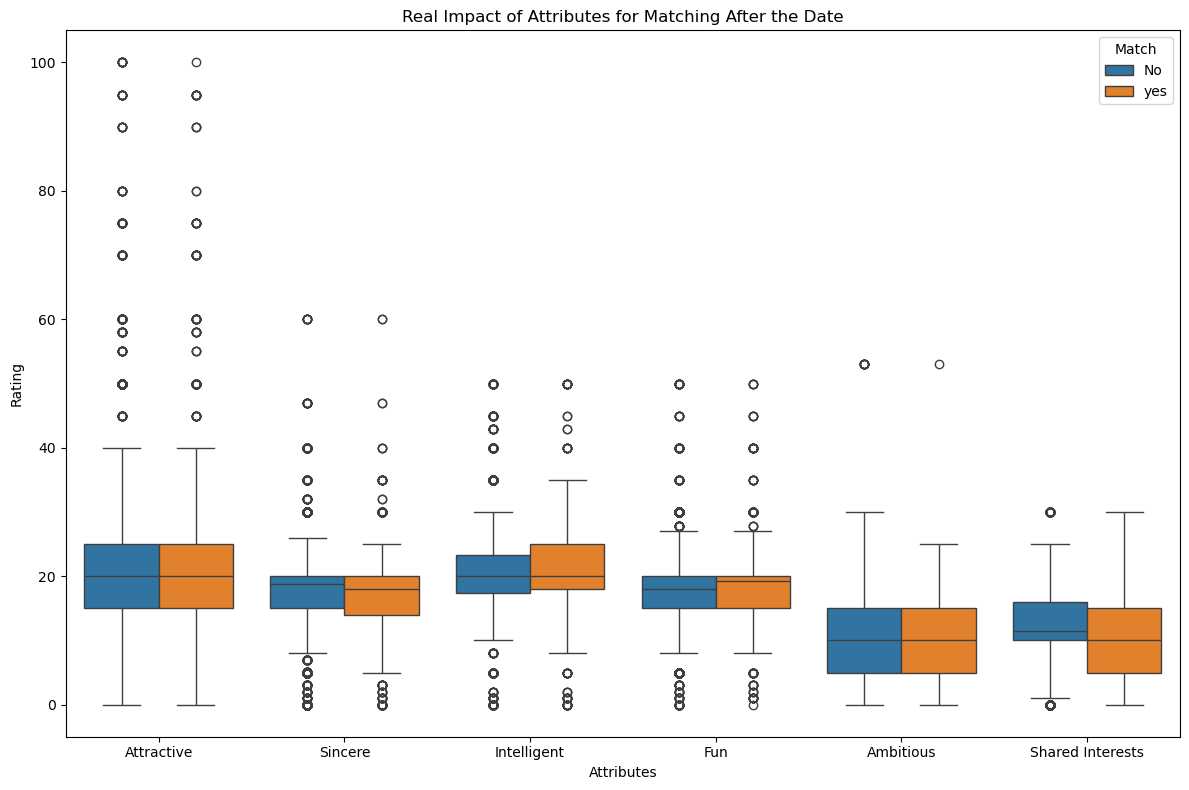

In [30]:
# Plotting the real impact of attributes for dating
plt.figure(figsize=(12, 8))
sns.boxplot(data=tinder_melted, x="variable", y="value", hue="match")
plt.title("Real Impact of Attributes for Matching After the Date")
plt.xlabel('Attributes')
plt.ylabel('Rating')
plt.legend(title='Match', loc='upper right')
plt.tight_layout()
plt.savefig("real_impact_of_attributes_match.png", dpi=300)
plt.show()

c:\Users\CGC\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6934.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\CGC\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6926.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\CGC\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6919.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\CGC\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6897.
  res = hypotest_fun_out(*samples, **kwds)


Statistical Test Results for Matches vs No Matches:
          Attribute                 Test  Statistic   P-value  Significant
0        Attractive  Mann-Whitney U Test  4716329.0  0.841092        False
1           Sincere  Mann-Whitney U Test  4512535.0  0.005919         True
2       Intelligent  Mann-Whitney U Test  4962201.5  0.003789         True
3               Fun  Mann-Whitney U Test  5022112.0  0.000151         True
4         Ambitious  Mann-Whitney U Test  4701170.0  0.962486        False
5  Shared Interests  Mann-Whitney U Test  4303151.0  0.000001         True


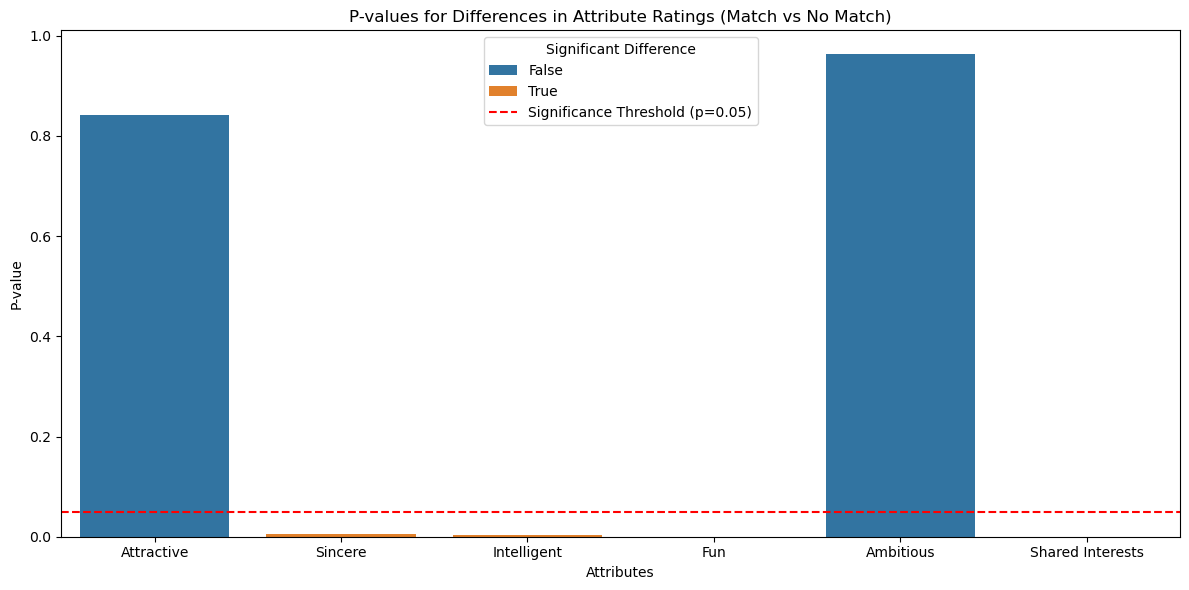

In [ ]:
from scipy.stats import ttest_ind, mannwhitneyu, shapiro

# Initialize a dictionary to store results
results = []

# Perform the tests for each attribute
for attribute in tinder_melted['variable'].unique():
    # Subset the data for this attribute
    match_yes = tinder_melted[(tinder_melted['variable'] == attribute) & (tinder_melted['match'] == 'yes')]['value']
    match_no = tinder_melted[(tinder_melted['variable'] == attribute) & (tinder_melted['match'] == 'No')]['value']
    
    # Check normality for both groups if there are enough samples
    if len(match_yes) >= 3 and len(match_no) >= 3:
        match_yes_normal = shapiro(match_yes).pvalue > 0.05
        match_no_normal = shapiro(match_no).pvalue > 0.05
        
        if match_yes_normal and match_no_normal:
            # Perform Welch's t-test for normal distributions
            stat, p = ttest_ind(match_yes, match_no, equal_var=False)
            test_type = "T-test (Welch)"
        else:
            # Perform Mann-Whitney U test for non-normal distributions
            stat, p = mannwhitneyu(match_yes, match_no, alternative='two-sided')
            test_type = "Mann-Whitney U Test"
    else:
        # Perform Mann-Whitney U test for small sample sizes
        stat, p = mannwhitneyu(match_yes, match_no, alternative='two-sided')
        test_type = "Mann-Whitney U Test (Small Sample)"
    
    # Append results
    results.append({
        'Attribute': attribute,
        'Test': test_type,
        'Statistic': stat,
        'P-value': p,
        'Significant': p < 0.05
    })

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results)

# Display results
print("Statistical Test Results for Matches vs No Matches:")
print(results_df)

# Plot P-values to visualize differences
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x='Attribute', y='P-value', hue='Significant', dodge=False)
plt.axhline(0.05, color='red', linestyle='--', label='Significance Threshold (p=0.05)')
plt.title("P-values for Differences in Attribute Ratings (Match vs No Match)")
plt.xlabel("Attributes")
plt.ylabel("P-value")
plt.legend(title="Significant Difference")
plt.tight_layout()
plt.savefig("match_vs_no_match_statistical_tests.png", dpi=300)
plt.show()

- The most important traits that both men and women look in a partner are attractiveness, sincerity, intelligence and fun.
- Men are more interested in attractiveness than women.
- Female are more interested in sincerity, ambitious and shared interests.
- No difference in intelligence and fun.

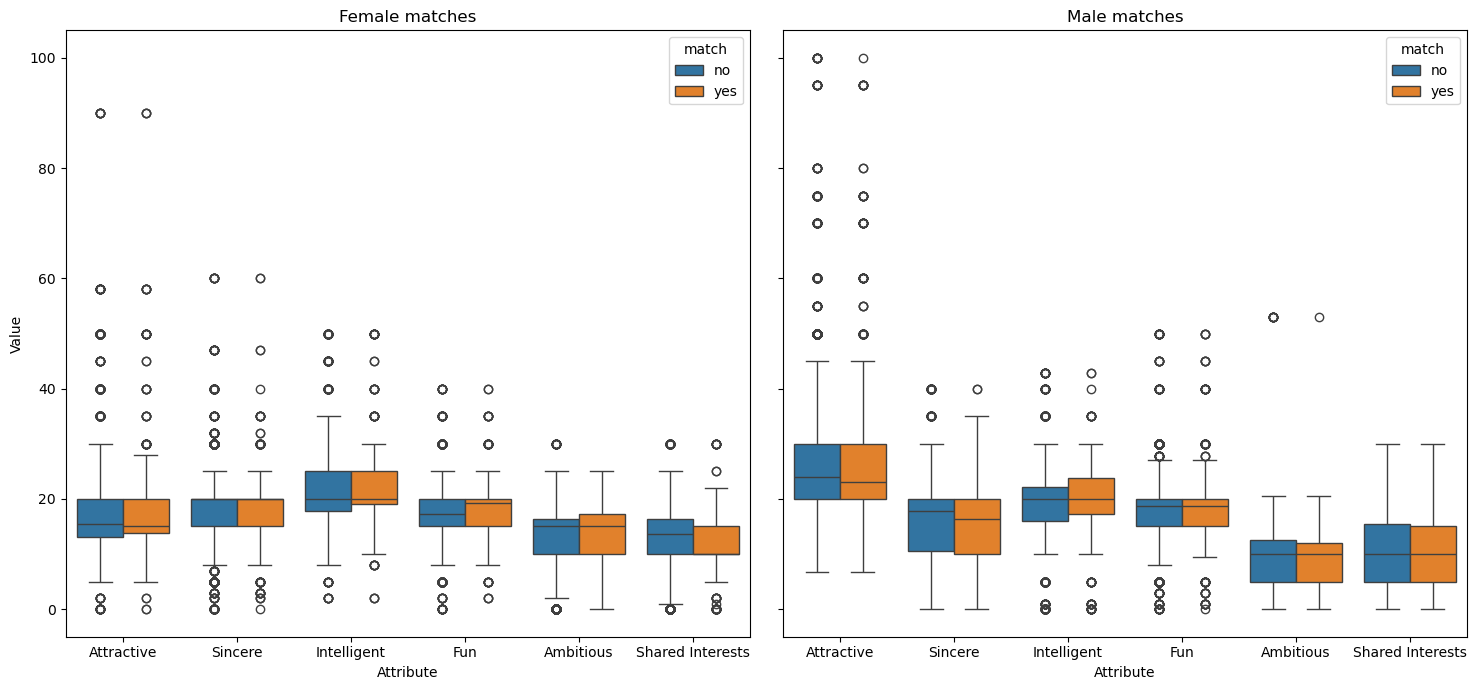

In [12]:
fem_opinion = tinder_melted[tinder_melted["gender"]== 'female']
male_opinion = tinder_melted[tinder_melted["gender"]=="male"]

# Create the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 7), sharey=True)

# Boxplot for female opinions
sns.boxplot(data=fem_opinion, x="variable", y="value", hue="match", ax=axes[0])
axes[0].set_title('Female matches')
axes[0].set_xlabel('Attribute')
axes[0].set_ylabel('Value')

# Boxplot for male opinions
sns.boxplot(data=male_opinion, x="variable", y="value", hue="match", ax=axes[1])
axes[1].set_title('Male matches')
axes[1].set_xlabel('Attribute')
axes[1].set_ylabel('Value')

# Show the plot
plt.tight_layout()
plt.savefig("female and male matches.png", dpi=300)
plt.show()

variable          Ambitious  Attractive       Fun  Intelligent  \
variable                                                         
Ambitious          1.000000   -0.997302 -0.570063     0.982364   
Attractive        -0.997302    1.000000  0.580594    -0.975559   
Fun               -0.570063    0.580594  1.000000    -0.407252   
Intelligent        0.982364   -0.975559 -0.407252     1.000000   
Shared Interests   0.900979   -0.910219 -0.864712     0.804152   
Sincere            0.941971   -0.963050 -0.666865     0.890104   

variable          Shared Interests   Sincere  
variable                                      
Ambitious                 0.900979  0.941971  
Attractive               -0.910219 -0.963050  
Fun                      -0.864712 -0.666865  
Intelligent               0.804152  0.890104  
Shared Interests          1.000000  0.938457  
Sincere                   0.938457  1.000000  


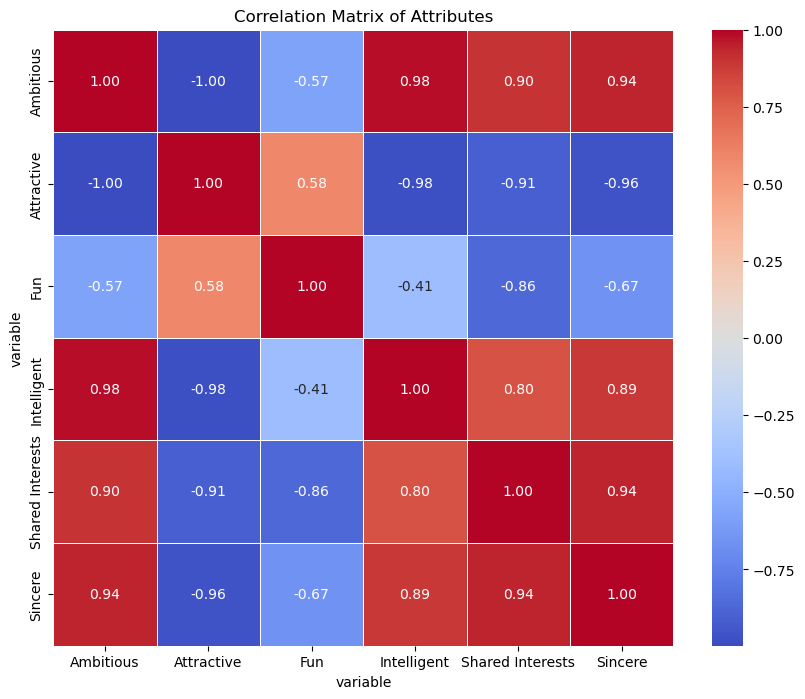

In [13]:
# Calculate the correlation matrix for the 'value' columns grouped by 'gender' and 'match'
corr = tinder_melted.pivot_table(index=['gender', 'match'], columns='variable', values='value').corr()
print(corr)

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Attributes")
plt.savefig("correlation matrix attributes.png", dpi=300)
plt.show()

# Are shared interests more important than a shared racial background?

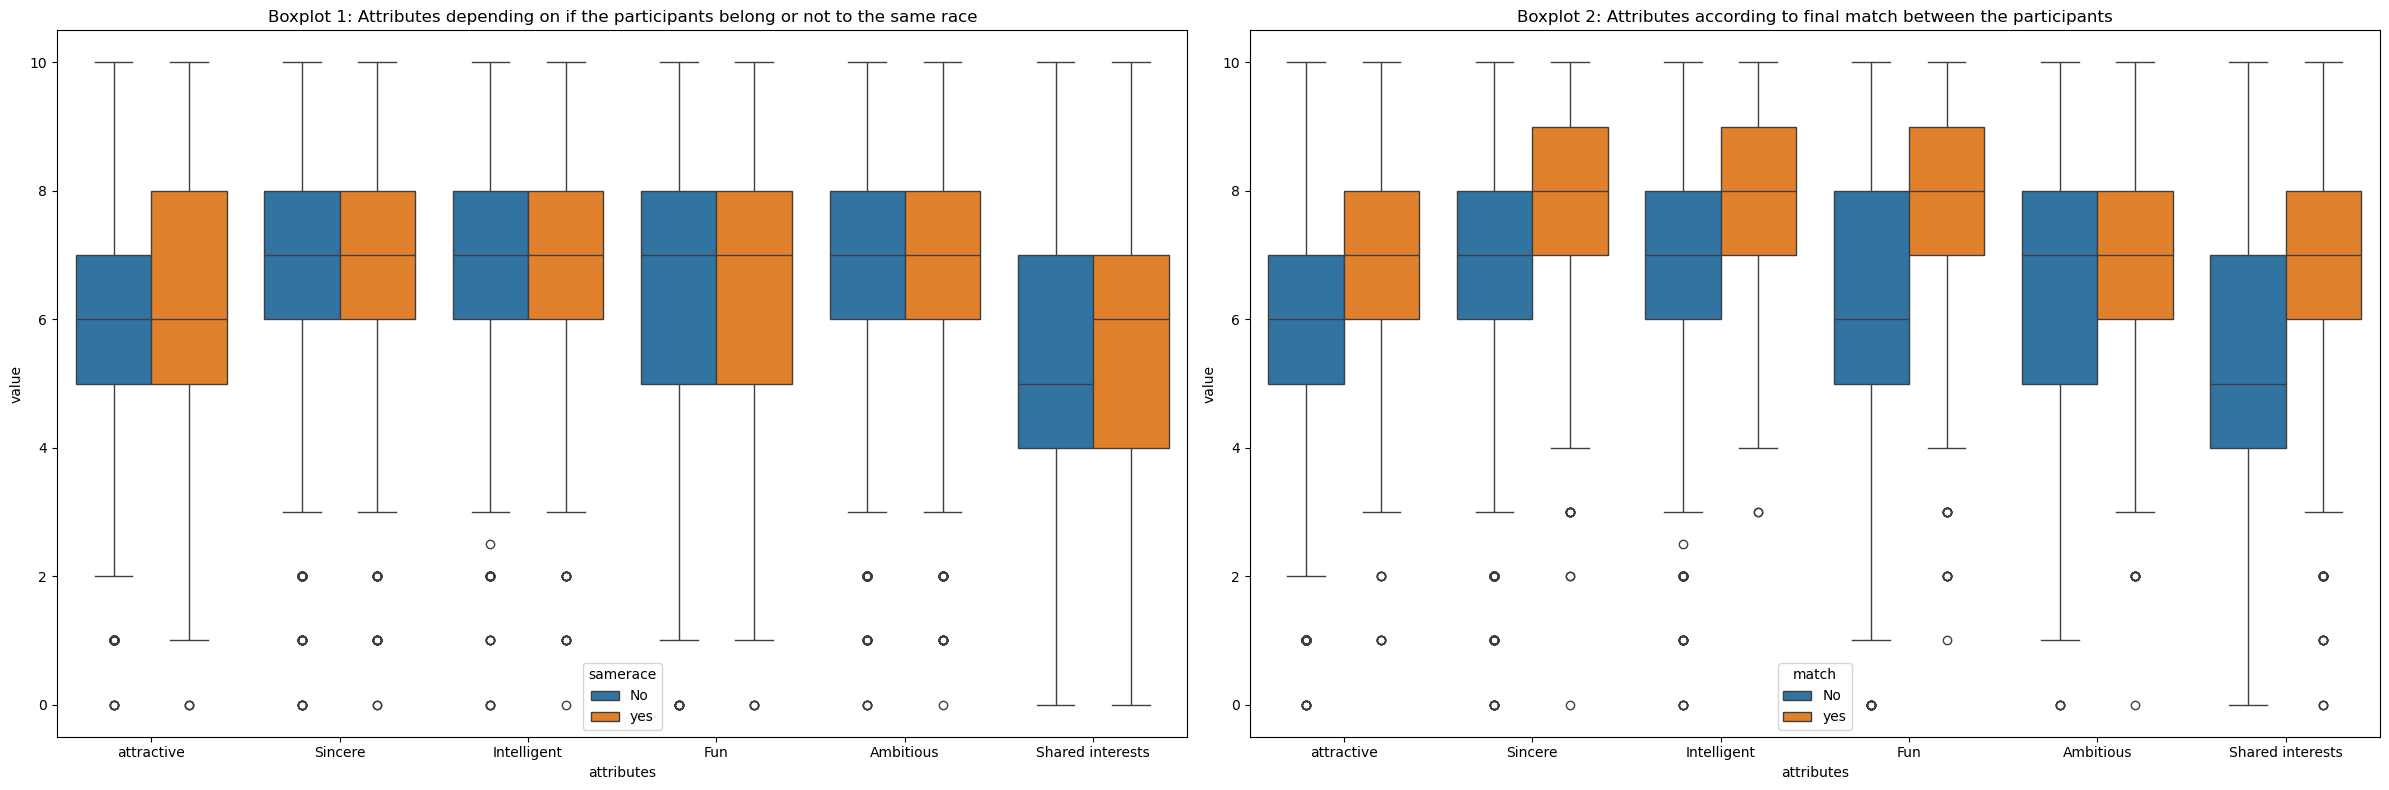

In [38]:
# Melt the DataFrame for the first boxplot
tinder_melted = pd.melt(tinder, 
                        id_vars=['gender', "match", "round", "wave", 'samerace', 'dec', "met", "prob", "like"],
                        value_vars=['attr', 'sinc', "intel", "fun", "amb", "shar", 'gender', "match", "round", "wave", "like"])
tinder_melted['attributes'] = tinder_melted['variable'].replace({"attr": 'attractive', "sinc": 'Sincere', "intel": 'Intelligent', 
                                                                "fun": 'Fun', "amb": 'Ambitious', "shar": 'Shared interests'})

# Melt the DataFrame for the second boxplot
tinder_melted2 = pd.melt(tinder, 
                         id_vars=['gender', "match", "round", "wave", 'samerace', 'dec', "met", "prob", "like"],
                         value_vars=['attr', 'sinc', "intel", "fun", "amb", "shar", 'gender', "match", "round", "wave", "like"])
tinder_melted2['attributes'] = tinder_melted2['variable'].replace({"attr": 'attractive', "sinc": 'Sincere', "intel": 'Intelligent', 
                                                                    "fun": 'Fun', "amb": 'Ambitious', "shar": 'Shared interests'})
tinder['match'] = tinder['match'].replace({1: 'yes', 0: 'No'}) 
tinder['met'] = tinder['met'].replace({1: 'yes', 2: 'No'}) 
tinder['samerace'] = tinder['samerace'].replace({1: 'yes', 0: 'No'}) 

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(24, 8))

sns.boxplot(data=tinder_melted, x="attributes", y="value", hue="samerace", ax=axes[0])
axes[0].set_title('Boxplot 1: Attributes depending on if the participants belong or not to the same race')

sns.boxplot(data=tinder_melted2, x="attributes", y="value", hue="match", ax=axes[1])
axes[1].set_title('Boxplot 2: Attributes according to final match between the participants')

# Adjust layout and display the plot
plt.tight_layout()
plt.savefig("Interests or racial background.png", dpi=300)
plt.show()

In [44]:
from scipy.stats import ttest_ind, mannwhitneyu, shapiro

# Initialize a dictionary to store results
results = []

# Ensure 'value' column is numeric and handle any invalid or missing data
tinder_melted['value'] = pd.to_numeric(tinder_melted['value'], errors='coerce')

# Perform the tests for each attribute
for attribute in tinder_melted['variable'].unique():
    # Subset the data for this attribute
    match_yes = tinder_melted[(tinder_melted['variable'] == attribute) & (tinder_melted['match'] == 'yes')]['value']
    match_no = tinder_melted[(tinder_melted['variable'] == attribute) & (tinder_melted['match'] == 'No')]['value']
    
    # Print subset lengths for debugging
    print(f"Attribute: {attribute}")
    print(f"Length of match_yes: {len(match_yes)}")
    print(f"Length of match_no: {len(match_no)}")
    
    # Check if subsets have enough data
    if len(match_yes) >= 3 and len(match_no) >= 3:
        # Check normality for both groups if there are enough samples
        match_yes_normal = shapiro(match_yes.dropna()).pvalue > 0.05
        match_no_normal = shapiro(match_no.dropna()).pvalue > 0.05
        
        if match_yes_normal and match_no_normal:
            # Perform Welch's t-test for normal distributions
            stat, p = ttest_ind(match_yes.dropna(), match_no.dropna(), equal_var=False)
            test_type = "T-test (Welch)"
        else:
            # Perform Mann-Whitney U test for non-normal distributions
            stat, p = mannwhitneyu(match_yes.dropna(), match_no.dropna(), alternative='two-sided')
            test_type = "Mann-Whitney U Test"
    else:
        # Perform Mann-Whitney U test for small sample sizes
        stat, p = mannwhitneyu(match_yes.dropna(), match_no.dropna(), alternative='two-sided')
        test_type = "Mann-Whitney U Test (Small Sample)"
    
    # Append results
    results.append({
        'Attribute': attribute,
        'Test': test_type,
        'Statistic': stat,
        'P-value': p,
        'Significant': p < 0.05
    })

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results)

# Display results
print("Statistical Test Results for Matches vs No Matches:")
print(results_df)

Attribute: attr
Length of match_yes: 1380
Length of match_no: 6998
Attribute: sinc
Length of match_yes: 1380
Length of match_no: 6998
Attribute: intel
Length of match_yes: 1380
Length of match_no: 6998
Attribute: fun
Length of match_yes: 1380
Length of match_no: 6998
Attribute: amb
Length of match_yes: 1380
Length of match_no: 6998
Attribute: shar
Length of match_yes: 1380
Length of match_no: 6998
Statistical Test Results for Matches vs No Matches:
  Attribute                 Test  Statistic        P-value  Significant
0      attr  Mann-Whitney U Test  6606455.5  1.331491e-131         True
1      sinc  Mann-Whitney U Test  5775366.5   4.680599e-51         True
2     intel  Mann-Whitney U Test  5784515.0   1.407847e-53         True
3       fun  Mann-Whitney U Test  6542060.0  5.989294e-148         True
4       amb  Mann-Whitney U Test  5028274.5   4.987443e-35         True
5      shar  Mann-Whitney U Test  5409745.5  5.727792e-124         True


c:\Users\CGC\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6799.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\CGC\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6731.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\CGC\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6712.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\CGC\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6663.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\CGC\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy

In [45]:
import numpy as np

# Initialize list for Cohen's d
effect_sizes = []

# Perform calculations for each attribute
for attribute in tinder_melted['variable'].unique():
    match_yes = tinder_melted[(tinder_melted['variable'] == attribute) & (tinder_melted['match'] == 'yes')]['value']
    match_no = tinder_melted[(tinder_melted['variable'] == attribute) & (tinder_melted['match'] == 'No')]['value']
    
    # Calculate means and standard deviations
    mean_yes = np.mean(match_yes)
    mean_no = np.mean(match_no)
    std_yes = np.std(match_yes)
    std_no = np.std(match_no)
    
    # Pooled standard deviation
    pooled_std = np.sqrt(((std_yes ** 2) + (std_no ** 2)) / 2)
    
    # Cohen's d calculation
    cohen_d = (mean_yes - mean_no) / pooled_std
    
    # Append the result
    effect_sizes.append({
        'Attribute': attribute,
        'Cohen\'s d': cohen_d
    })

# Convert to DataFrame
effect_size_df = pd.DataFrame(effect_sizes)

# Display the results
print(effect_size_df)


  Attribute  Cohen's d
0      attr   0.770558
1      sinc   0.472447
2     intel   0.491974
3       fun   0.832019
4       amb   0.393796
5      shar   0.777336


In [15]:
from scipy.stats import chi2_contingency

# Create a contingency table for 'samerace' and 'match'
contingency_table = pd.crosstab(tinder['samerace'], tinder['match'])

# Perform Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpret the result
if p < 0.05:
    print("There is a significant association between 'samerace' and 'match'.")
else:
    print("No significant association between 'samerace' and 'match'.")

Chi-square Statistic: 1.3510079278165368
P-value: 0.2451019867908204
Degrees of Freedom: 1
Expected Frequencies:
 [[4228.20195751  833.79804249]
 [2769.79804249  546.20195751]]
No significant association between 'samerace' and 'match'.


 - There is no significant difference in the grading of the features whether you are or not from the same race. 
 - No significant association between 'samerace' and 'match. (chi-square test)
 - Attractiveness, sincerity, intelligence, fun and shared interests are important for matching. However, ambition is not a trait that is important to match.

👇 In the graph bellow 👇 you can see the trends:
- When the attributes are ranked high, the more the participant like the date.
- There are more persons with low values (bellow 7), there is less persons ranked with high values (above 7).

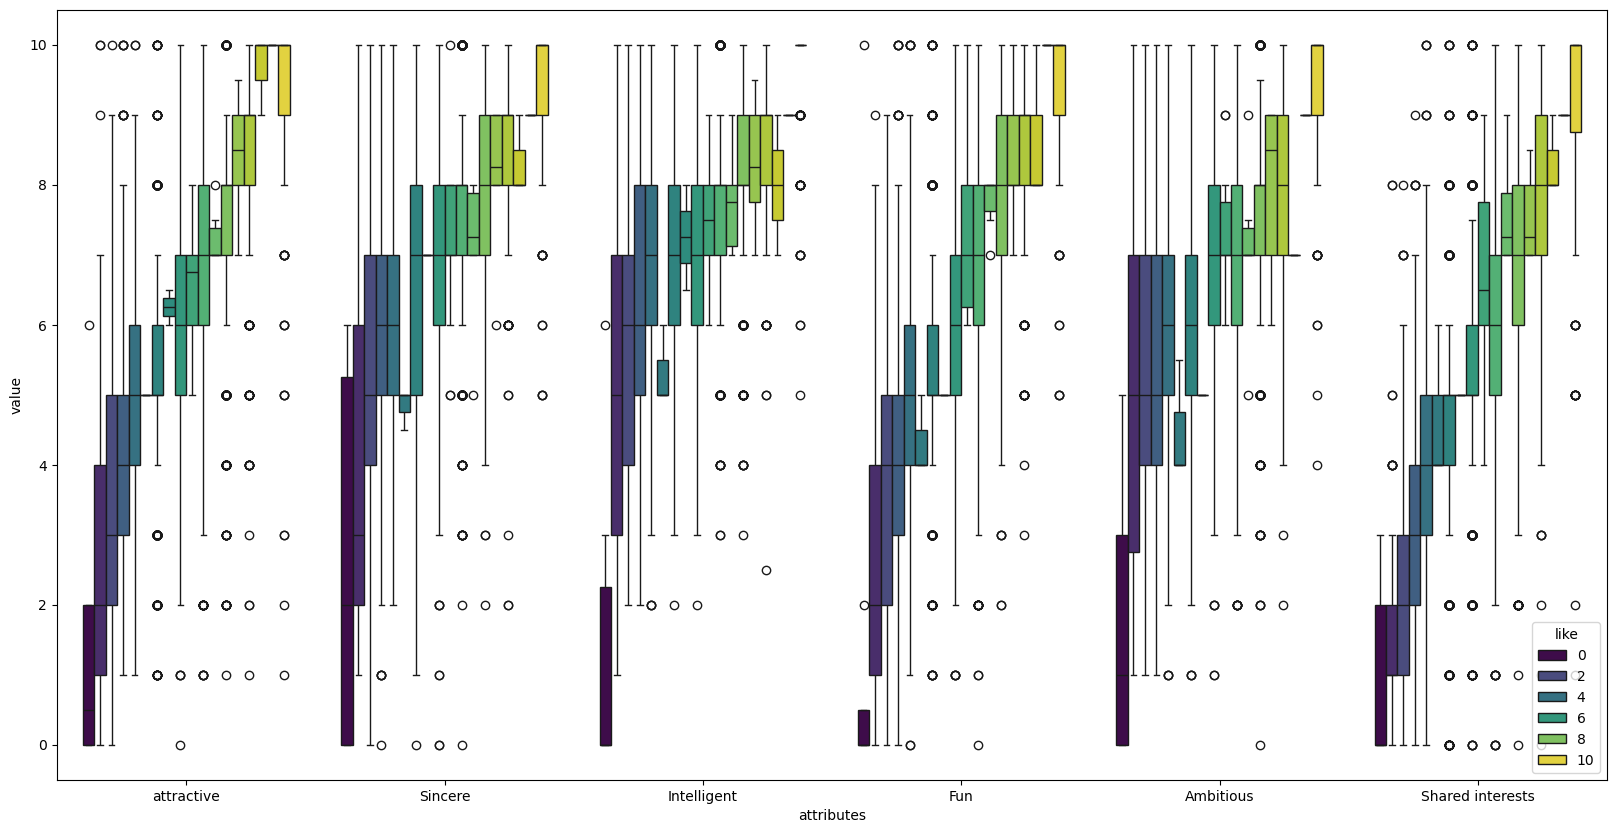

In [16]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=tinder_melted2 , x="attributes", y="value", hue="like", palette = "viridis")   
plt.savefig("attribute against quality of date.png", dpi=300)
plt.show()

# Can people accurately predict their own perceived value in the dating market?

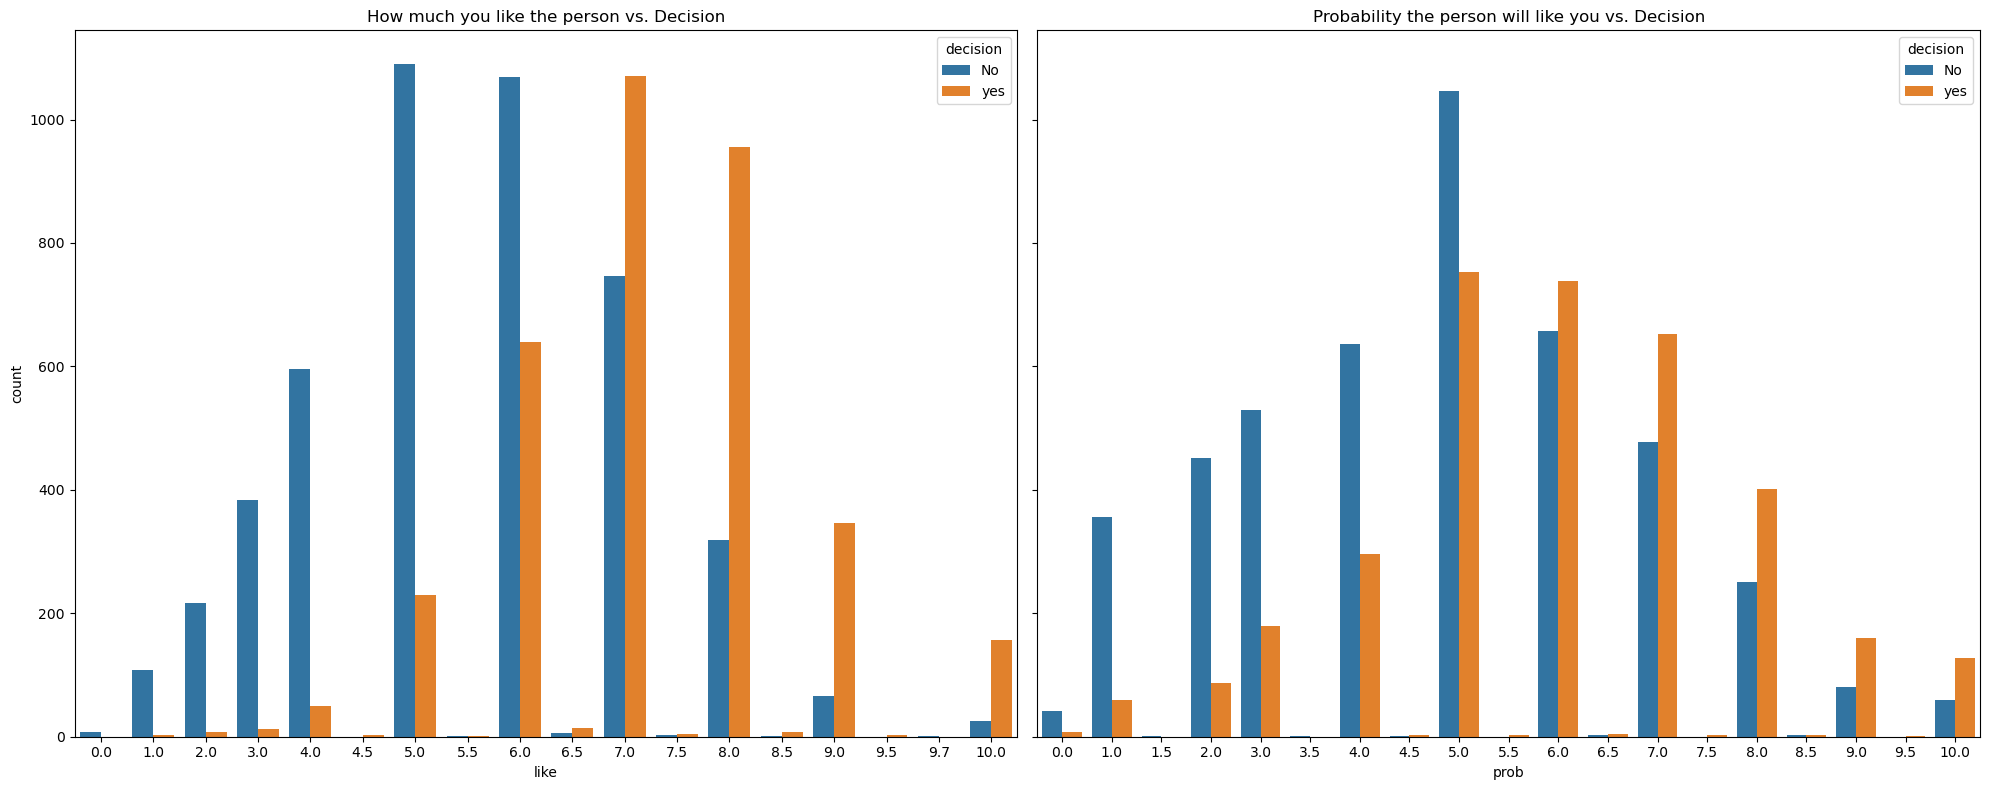

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)
tinder['decision'] = tinder['dec'].replace({1: 'yes', 0: 'No'}) 

sns.countplot(data=tinder, x="like", hue='decision', ax=axes[0])
axes[0].set_title('How much you like the person vs. Decision')

sns.countplot(data=tinder, x="prob", hue='decision', ax=axes[1])
axes[1].set_title('Probability the person will like you vs. Decision')

plt.tight_layout()
plt.savefig("perception vs decision.png", dpi=300)
plt.show()
plt.show()

In [18]:
mode_like_yes = tinder[tinder['decision'] == 'yes']['like'].mode()
print(mode_like_yes)

mode_like_no = tinder[tinder['decision'] == 'No']['like'].mode()
print(mode_like_no)

0    7.0
Name: like, dtype: float64
0    5.0
Name: like, dtype: float64


In [19]:
mode_prob_yes = tinder[tinder['decision'] == 'yes']['prob'].mode()
print(mode_prob_yes)

mode_prob_no = tinder[tinder['decision'] == 'No']['prob'].mode()
print(mode_prob_no)

0    5.0
Name: prob, dtype: float64
0    5.0
Name: prob, dtype: float64


- People which were ranked with a grade of 7-8-9-10 according to how much they like the date, have a final decision of YES to go to next round.
- When people ranked with a 5-6, most decided NOT to meet in the next round.
- People have a lower perception of themselfs, the scores were smaller when participants have to rank themselves.
- Participants underestimate their probability to be chosen. 

# CONCLUSIONS/ RECAP:
- Is there a gender difference in the perception of attributes? YES, men are more interested in attractiveness, while women are more interested in sincerity, ambition, and shared interests.
- How important do people think attractiveness is in choosing a potential partner compared to its real impact? Attractiveness is overrated; it is not important for a sincere match. Sincerity, intelligence, humor, and shared interests are more important.
- Are shared interests more important than a shared racial background? YES.
- Can people accurately predict their own perceived value in the dating market? NO, they underestimate themselves.